https://heartbeat.comet.ml/how-to-build-a-text-classification-model-using-huggingface-transformers-and-comet-4d40236e8f84



In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install huggingface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install huggingface transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.3 MB/s eta 0:00:00


In [4]:
id2label = {0: "United States", 1: "United Kingdom", 2: "Canada", 3: "Australia", 4: "India", 5: "Nigeria"}
label2id = {"United States": 0, "United Kingdom": 1, "Canada": 2, "Australia": 3, "India": 4, "Nigeria": 5}

## Preprocessing

In [ ]:
df = pd.read_csv('filtered_data.csv')

/var/folders/b1/vw0sn5w90nnccbfn7bskv0jm0000gn/T/ipykernel_27870/2619961329.py:1: DtypeWarning: Columns (0,1,10,11,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('filtered_data.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911730 entries, 0 to 911729
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              911730 non-null  object 
 1   tweet_id             911716 non-null  object 
 2   tweet_text           911716 non-null  object 
 3   place_id             891950 non-null  object 
 4   place_name           891950 non-null  object 
 5   full_place_name      891950 non-null  object 
 6   country              891950 non-null  object 
 7   country_code         891950 non-null  object 
 8   place_type           891950 non-null  object 
 9   username             891950 non-null  object 
 10  profile_description  791620 non-null  object 
 11  profile_name         891943 non-null  object 
 12  profile_location     768326 non-null  object 
 13  lat                  891950 non-null  object 
 14  lon                  859170 non-null  float64
 15  clean_text       

In [ ]:
df = df.drop(['withheld'], axis = 1)

KeyError: "['withheld'] not found in axis"

In [ ]:
country_list = ['United States', 'United Kingdom', 'Canada', 'India', 'Australia', 'Nigeria']
df= df[df['country'].isin(country_list)]

In [ ]:
df['country'].value_counts()

United States     668904
United Kingdom     73613
Canada             41151
India              29255
Australia          24717
Nigeria            21530
Name: country, dtype: int64

In [ ]:
df.head()

,user_id,tweet_id,tweet_text,place_id,place_name,full_place_name,country,country_code,place_type,username,profile_description,profile_name,profile_location,lat,lon,clean_text
0,1051074201082388480,1637850668214960128,@Gajendr70729189 @amitsharma2704 @1shankarshar...,5f55bb82cf16ac81,Bengaluru South,"Bengaluru South, India",India,IN,city,Pavanasoonu,Global SAP Tech. #Jyotishkatti. Spiritual cou...,Pavanasoonu,"Bengaluru, India",77.496999,12.923098,Including my SAP technology business. Thank ...
1,1051074201082388480,1637818231863001090,@JatinPandyaVBNJ @1shankarsharma Indeed. Nadi...,5f55bb82cf16ac81,Bengaluru South,"Bengaluru South, India",India,IN,city,Pavanasoonu,Global SAP Tech. #Jyotishkatti. Spiritual cou...,Pavanasoonu,"Bengaluru, India",77.496999,12.923098,Indeed. Nadi Jyotish has excellent rules. N...
2,1051074201082388480,1637737394911969280,@1shankarsharma Namaste. How many years have ...,5f55bb82cf16ac81,Bengaluru South,"Bengaluru South, India",India,IN,city,Pavanasoonu,Global SAP Tech. #Jyotishkatti. Spiritual cou...,Pavanasoonu,"Bengaluru, India",77.496999,12.923098,Namaste. How many years have you spent learn...
3,1051074201082388480,1637733079002537986,An excellent example of jumping into conclusio...,5f55bb82cf16ac81,Bengaluru South,"Bengaluru South, India",India,IN,city,Pavanasoonu,Global SAP Tech. #Jyotishkatti. Spiritual cou...,Pavanasoonu,"Bengaluru, India",77.496999,12.923098,An excellent example of jumping into conclusio...
4,1051074201082388480,1637660117624836096,The want for financial security must be balanc...,5f55bb82cf16ac81,Bengaluru South,"Bengaluru South, India",India,IN,city,Pavanasoonu,Global SAP Tech. #Jyotishkatti. Spiritual cou...,Pavanasoonu,"Bengaluru, India",77.496999,12.923098,The want for financial security must be balanc...


In [ ]:
filtered_df = df[['user_id', 'tweet_id', 'tweet_text', 'country']]

In [ ]:
filtered_df.head()

,user_id,tweet_id,tweet_text,country
0,1051074201082388480,1637850668214960128,@Gajendr70729189 @amitsharma2704 @1shankarshar...,India
1,1051074201082388480,1637818231863001090,@JatinPandyaVBNJ @1shankarsharma Indeed. Nadi...,India
2,1051074201082388480,1637737394911969280,@1shankarsharma Namaste. How many years have ...,India
3,1051074201082388480,1637733079002537986,An excellent example of jumping into conclusio...,India
4,1051074201082388480,1637660117624836096,The want for financial security must be balanc...,India


In [ ]:
updated_df = filtered_df.astype({'user_id':int, 'tweet_id': int, 'tweet_text': str, 'country':str})

In [ ]:
updated_df.to_csv('updated_df.csv')

In [ ]:
updated_df.dtypes

user_id        int64
tweet_id       int64
tweet_text    object
country       object
dtype: object

In [ ]:
updated_df.shape

(859170, 4)

In [ ]:
sample_df = updated_df.sample(5000, random_state = 1)

In [ ]:
sample_df.head()

,user_id,tweet_id,tweet_text,country
778097,490104241,1637289107557879808,My aunt married a white man with the last name...,United States
704769,2486046872,1635484083256979456,@GovRonDeSantis It shouldn't include theologic...,United States
603215,1374446305146138626,1633236299640365057,"I had my best day ever at work, today!!!!! Fou...",United States
455462,100339412,1637856072521363456,@DawiLDanger My earbuds are from Big Lots (a c...,United States
626596,1488755185,1637782944667320320,@CraigAFountain Same! Thanks for having me!!!,United States


In [ ]:
sample_df['country'] = sample_df['country'].apply(lambda x: label2id[x])

KeyError: 0

In [ ]:
sample_df.head()

,user_id,tweet_id,tweet_text,country
810865,490104241,1637289107557879808,My aunt married a white man with the last name...,0
737537,2486046872,1635484083256979456,@GovRonDeSantis It shouldn't include theologic...,0
635983,1374446305146138626,1633236299640365057,"I had my best day ever at work, today!!!!! Fou...",0
488230,100339412,1637856072521363456,@DawiLDanger My earbuds are from Big Lots (a c...,0
659364,1488755185,1637782944667320320,@CraigAFountain Same! Thanks for having me!!!,0


In [ ]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 778097 to 705133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     5000 non-null   int64 
 1   tweet_id    5000 non-null   int64 
 2   tweet_text  5000 non-null   object
 3   country     5000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 195.3+ KB


In [ ]:
train, validate, test = np.split(sample_df.sample(frac=1), [int(.6*len(sample_df)), int(.8*len(sample_df))])

In [ ]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index = False)
validate.to_csv('validate.csv', index = False)

## Start Here

In [5]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 21.6 MB/s eta 0:00:00


In [6]:
from datasets import Dataset

In [11]:
ds_train = Dataset.from_csv('train_twitter.csv')
ds_val = Dataset.from_csv('validate_twitter.csv')
ds_test = Dataset.from_csv('test_twitter.csv')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-c1b5536a8f922ef7/0.0.0. Subsequent calls will reuse this data.


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-7830f2c60def0b3a/0.0.0. Subsequent calls will reuse this data.


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-367f7d9d810eb2c6/0.0.0. Subsequent calls will reuse this data.


In [12]:
ds = {"train": ds_train, "validation": ds_val, "test": ds_test}

In [13]:
ds_train[0]

{'user_id': 541039653,
 'tweet_id': 1635985138780712960,
 'tweet_text': 'We survived another year together! 🎉🥳🎂😘🎊🐕🤗1️⃣4️⃣🎈🎁\U0001faa9 https://t.co/lituWnFKjw',
 'country': 2}

In [15]:
ds_train

Dataset({
    features: ['user_id', 'tweet_id', 'tweet_text', 'country'],
    num_rows: 3000
})

In [14]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained("Twitter/twhin-bert-base", num_labels=6, id2label=id2label, label2id=label2id)

Some weights of the model checkpoint at Twitter/twhin-bert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Twitter/twhin-bert-ba

In [16]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, DataCollatorWithPadding
tokenizer = AutoTokenizer.from_pretrained('Twitter/twhin-bert-base')

In [17]:
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

def preprocess_function(examples):
    label = examples["country"] 
    # examples['tweet_text'].apply(preprocess)
    examples = tokenizer(preprocess(examples["tweet_text"]), truncation=True, padding="max_length", max_length=256, return_tensors='pt')
    for key in examples:
        examples[key] = examples[key].squeeze(0)
    examples["label"] = label
    return examples

for split in ds:
    ds[split] = ds[split].map(preprocess_function, remove_columns=['user_id', 'tweet_id', 'tweet_text', 'country'])
    ds[split].set_format('pt')

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [18]:
example = next(iter(ds['test']))

In [19]:
tokenizer.decode(example['input_ids'])

'<s> @user You can’t be serious http</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>

In [20]:
ds['train']["label"][:10]

tensor([2, 3, 1, 0, 0, 4, 0, 0, 0, 1])

In [21]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 9.4 MB/s eta 0:00:00


In [22]:
import evaluate

accuracy = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")

In [23]:
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {"accuracy": accuracy.compute(predictions=predictions, references=labels), "f1":f1_metric.compute(predictions=predictions, references=labels, average="weighted")}

In [24]:
import torch
class TwitterTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss = torch.nn.functional.cross_entropy(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [25]:
from transformers import TrainingArguments
from transformers import Trainer

In [26]:
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer = TwitterTrainer(
    model=model,
    args=training_args,
    train_dataset=ds["train"],
    eval_dataset=ds["validation"],
    compute_metrics=compute_metrics
)

trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.822023,{'accuracy': 0.766},{'f1': 0.7572330887390651}
2,No log,0.770083,{'accuracy': 0.809},{'f1': 0.7778050846159162}
3,0.458500,0.806632,{'accuracy': 0.824},{'f1': 0.7864996046355595}


Trainer is attempting to log a value of "{'accuracy': 0.766}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.7572330887390651}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.809}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.7778050846159162}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.824}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This

TrainOutput(global_step=564, training_loss=0.44751882214918204, metrics={'train_runtime': 543.3863, 'train_samples_per_second': 16.563, 'train_steps_per_second': 1.038, 'total_flos': 1184042271744000.0, 'train_loss': 0.44751882214918204, 'epoch': 3.0})

In [27]:
trainer.evaluate()

Trainer is attempting to log a value of "{'accuracy': 0.809}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.7778050846159162}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


{'eval_loss': 0.7700828313827515,
 'eval_accuracy': {'accuracy': 0.809},
 'eval_f1': {'f1': 0.7778050846159162},
 'eval_runtime': 17.4191,
 'eval_samples_per_second': 57.408,
 'eval_steps_per_second': 3.617,
 'epoch': 3.0}

In [28]:
predictions = trainer.predict(ds['test'])

In [29]:
predictions

PredictionOutput(predictions=array([[ 4.5020862e+00, -3.0411925e-02,  2.9392606e-01, -6.7095339e-01,
        -2.0073857e+00, -1.3522004e+00],
       [-2.5730608e+00,  1.3764390e+00,  4.7007126e-01,  9.3518907e-01,
        -1.5484963e-01, -2.8370067e-01],
       [-7.2359562e-01,  1.7161506e+00,  4.1466309e-03,  1.0156350e+00,
        -6.5258712e-01, -1.0871596e+00],
       ...,
       [ 5.3783450e+00, -3.8976735e-01,  3.8077205e-02, -9.4878376e-01,
        -1.7998137e+00, -1.3673768e+00],
       [ 4.6962380e+00,  3.5733584e-01,  1.3388475e-02, -6.3733375e-01,
        -2.0204029e+00, -1.6745800e+00],
       [ 4.6737785e+00, -1.7034042e-01,  3.6994874e-02, -6.6557688e-01,
        -1.8700981e+00, -1.2920362e+00]], dtype=float32), label_ids=array([0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 1, 0, 0, 2, 5, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       4, 0, 0, 1, 0, 0, 0, 0, 0, 0

In [30]:
predictions[0]

array([[ 4.5020862e+00, -3.0411925e-02,  2.9392606e-01, -6.7095339e-01,
        -2.0073857e+00, -1.3522004e+00],
       [-2.5730608e+00,  1.3764390e+00,  4.7007126e-01,  9.3518907e-01,
        -1.5484963e-01, -2.8370067e-01],
       [-7.2359562e-01,  1.7161506e+00,  4.1466309e-03,  1.0156350e+00,
        -6.5258712e-01, -1.0871596e+00],
       ...,
       [ 5.3783450e+00, -3.8976735e-01,  3.8077205e-02, -9.4878376e-01,
        -1.7998137e+00, -1.3673768e+00],
       [ 4.6962380e+00,  3.5733584e-01,  1.3388475e-02, -6.3733375e-01,
        -2.0204029e+00, -1.6745800e+00],
       [ 4.6737785e+00, -1.7034042e-01,  3.6994874e-02, -6.6557688e-01,
        -1.8700981e+00, -1.2920362e+00]], dtype=float32)

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
predictions_array = np.argmax(predictions[0], axis = 1)

In [33]:
predictions_array

array([0, 1, 1, 0, 0, 0, 0, 5, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 5, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 5, 0, 3, 4, 5, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
labels_array = predictions[1]
labels_array

array([0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 1, 0, 0, 2, 5, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 5, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 5, 0, 3, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 5, 2, 0, 0, 0, 0, 0, 0, 5, 0, 0,

In [35]:
confusion_matrix(labels_array, predictions_array)

array([[753,  40,   5,   4,   5,   5],
       [ 41,  18,   0,   1,   2,   2],
       [ 38,   6,   4,   0,   2,   0],
       [ 19,   5,   1,   3,   0,   0],
       [ 10,   2,   1,   0,  18,   1],
       [  5,   2,   1,   0,   0,   6]])

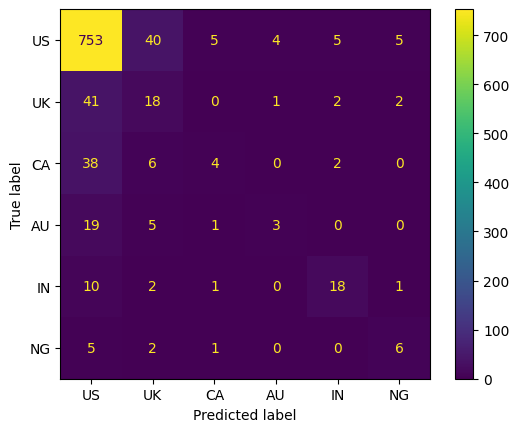

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(labels_array, predictions_array)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['US', 'UK', 'CA', 'AU', 'IN', 'NG'])
cm_display.plot();

In [37]:
from sklearn.metrics import f1_score
print(f1_score(labels_array, predictions_array, average='weighted'))

0.7822288019998014


In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_array, predictions_array))

0.802


### TRYING AGAIN WITH MORE BALANCED DATA

In [38]:
train_twitter = pd.read_csv('train_twitter.csv')
test_twitter = pd.read_csv('test_twitter.csv')
validate_twitter = pd.read_csv('validate_twitter.csv')

In [41]:
train_twitter.head()

,user_id,tweet_id,tweet_text,country
0,541039653,1635985138780712960,We survived another year together! 🎉🥳🎂😘🎊🐕🤗1️⃣4...,2
1,1412960377432809472,1637344149665124358,@theplaypen_ @cumwalkfan Give it to me Daddy 😋,3
2,334925770,1635377811832856578,@dlolley_pgh Live look at the cupboard.... htt...,1
3,1548840454036373504,1634355747646578688,"@JerasIkehorn Cold, calculating and also very ...",0
4,706323234304577537,1637772904401190913,@KenGardner11 @redneckgeisha Muted the trump “...,0


In [43]:
train_twitter['country'].value_counts(normalize=True)

0    0.789000
1    0.083000
2    0.040333
4    0.037333
3    0.029667
5    0.020667
Name: country, dtype: float64

In [44]:
from imblearn.under_sampling import RandomUnderSampler

Trying DICE Loss

In [26]:
!pip install sadice

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from sadice import SelfAdjDiceLoss

In [28]:
criterion = SelfAdjDiceLoss()
class TwitterTrainerDice(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss = criterion(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [29]:
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer_DICE = TwitterTrainerDice(
    model=model,
    args=training_args,
    train_dataset=ds["train"],
    eval_dataset=ds["validation"],
    compute_metrics=compute_metrics
)

trainer_DICE.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.348516,{'accuracy': 0.814},{'f1': 0.7487353022481734}
2,No log,0.347079,{'accuracy': 0.826},{'f1': 0.7761361825902494}


Trainer is attempting to log a value of "{'accuracy': 0.814}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.7487353022481734}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.826}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.7761361825902494}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


TrainOutput(global_step=376, training_loss=0.3492264037436627, metrics={'train_runtime': 358.2834, 'train_samples_per_second': 16.747, 'train_steps_per_second': 1.049, 'total_flos': 789361514496000.0, 'train_loss': 0.3492264037436627, 'epoch': 2.0})

In [30]:
dice_preds = trainer_DICE.predict(ds['test'])

In [33]:
labels_array = dice_preds[1]

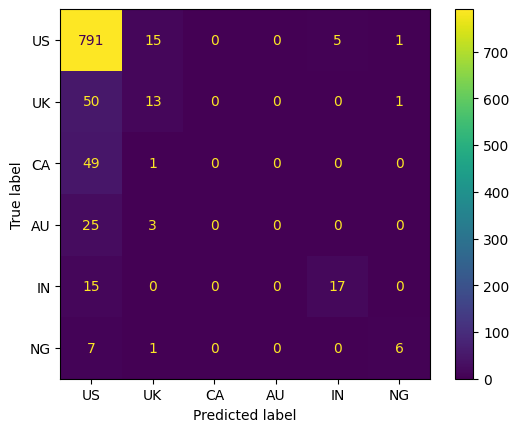

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
predictions_array_dice = np.argmax(dice_preds[0], axis = 1)
cm = confusion_matrix(labels_array, predictions_array_dice)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['US', 'UK', 'CA', 'AU', 'IN', 'NG'])
cm_display.plot();

In [35]:
from sklearn.metrics import f1_score
print(f1_score(labels_array, predictions_array_dice, average='weighted'))

0.779406846785956


In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_array, predictions_array_dice))

0.827


Weighted Cross Entropy

In [39]:
1 / train_twitter['country'].value_counts(normalize=True)

0     1.267427
1    12.048193
2    24.793388
4    26.785714
3    33.707865
5    48.387097
Name: country, dtype: float64

In [40]:
cuda = torch.device('cuda') 

In [41]:
class_weights = torch.FloatTensor([1.267427, 12.048193, 24.793388, 33.707865, 26.785714, 48.387097]).cuda()

In [42]:
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)
class TwitterTrainerWeighted(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss = criterion(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [43]:
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer_weighted = TwitterTrainerDice(
    model=model,
    args=training_args,
    train_dataset=ds["train"],
    eval_dataset=ds["validation"],
    compute_metrics=compute_metrics
)

trainer_weighted.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.630442,{'accuracy': 0.68},{'f1': 0.7133448870264286}
2,No log,1.686091,{'accuracy': 0.763},{'f1': 0.7637432055711711}


Trainer is attempting to log a value of "{'accuracy': 0.68}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.7133448870264286}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.763}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.7637432055711711}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.630442,{'accuracy': 0.68},{'f1': 0.7133448870264286}
2,No log,1.686091,{'accuracy': 0.763},{'f1': 0.7637432055711711}


TrainOutput(global_step=376, training_loss=1.0959021385679855, metrics={'train_runtime': 360.4404, 'train_samples_per_second': 16.646, 'train_steps_per_second': 1.043, 'total_flos': 789361514496000.0, 'train_loss': 1.0959021385679855, 'epoch': 2.0})

In [44]:
weighted_preds = trainer_weighted.predict(ds['test'])

In [63]:
weighted_preds[0]

array([[ 2.5792274 , -0.674859  ,  1.7976317 , -1.1032265 , -2.044441  ,
        -0.2655184 ],
       [-2.1240864 ,  2.7245574 ,  0.6137414 ,  0.51185733, -1.5359646 ,
        -0.9010014 ],
       [-0.3316467 ,  3.0882943 , -0.3703141 ,  0.8629178 , -1.8656287 ,
        -1.6121818 ],
       ...,
       [ 5.1705394 , -0.9077722 ,  0.39935508, -1.0239805 , -1.6160069 ,
        -1.001564  ],
       [ 3.51529   ,  1.5134287 ,  0.27323255, -0.55893457, -2.3830245 ,
        -1.9597301 ],
       [ 4.740747  , -0.7824093 ,  0.35470122, -0.7432557 , -1.7500972 ,
        -0.98699796]], dtype=float32)

In [45]:
predictions_array_weighted = np.argmax(weighted_preds[0], axis = 1)

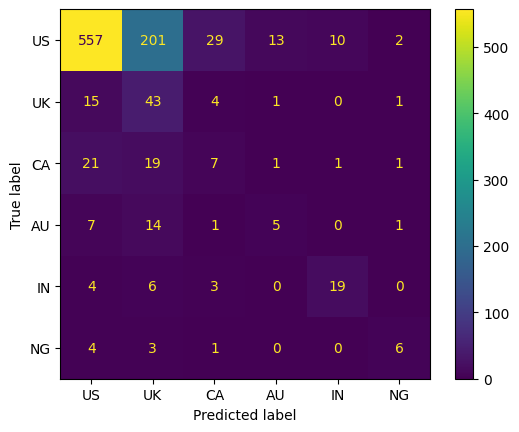

In [46]:
cm = confusion_matrix(labels_array, predictions_array_weighted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['US', 'UK', 'CA', 'AU', 'IN', 'NG'])
cm_display.plot();

In [47]:
print(f1_score(labels_array, predictions_array_weighted, average='weighted'))

0.6922800902073448


In [48]:
print(accuracy_score(labels_array, predictions_array_weighted))

0.637


Trying KL LOSS Instead

In [50]:
kl_loss = torch.nn.KLDivLoss(reduction="batchmean")

Trying IMBLEARN

In [49]:
df = ds['train'].to_pandas()

In [50]:
df

,input_ids,attention_mask,label
0,"[0, 1401, 188545, 71, 15700, 6602, 25842, 38, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2
1,"[0, 1374, 65918, 1374, 65918, 77878, 442, 47, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...",3
2,"[0, 1374, 65918, 9251, 6713, 99, 70, 45364, 24...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...",1
3,"[0, 1374, 65918, 146185, 4, 74481, 1916, 136, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
4,"[0, 1374, 65918, 1374, 65918, 42015, 297, 70, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
...,...,...,...
2995,"[0, 1374, 65918, 6, 4, 1374, 65918, 151117, 19...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
2996,"[0, 1374, 65918, 3493, 15400, 31358, 19336, 20...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
2997,"[0, 13501, 194994, 7, 11617, 44532, 3164, 9, 4...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
2998,"[0, 1650, 7, 1733, 172552, 47, 2046, 1919, 6, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0


In [51]:
df_train = ds['train'].to_pandas()  # convert to a Pandas DataFrame

from imblearn.under_sampling import RandomUnderSampler

# Apply oversampling to address class imbalance
rus = RandomUnderSampler(sampling_strategy='majority', random_state=1)
X_resampled_train, y_resampled_train = rus.fit_resample(df_train[['input_ids', 'attention_mask']].to_numpy(), df_train['label'].to_numpy())

# Convert back to a DataFrame and create a new Hugging Face dataset
df_resampled_train = pd.DataFrame({'input_ids': X_resampled_train[:, 0], 'attention_mask': X_resampled_train[:, 1], 'label': y_resampled_train})
ds_train_res = Dataset.from_pandas(df_resampled_train)



df_validation = ds['validation'].to_pandas()  # convert to a Pandas DataFrame

X_resampled_val, y_resampled_val = rus.fit_resample(df_validation[['input_ids', 'attention_mask']].to_numpy(), df_validation['label'].to_numpy())

df_resampled_val = pd.DataFrame({'input_ids': X_resampled_val[:, 0], 'attention_mask': X_resampled_val[:, 1], 'label': y_resampled_val})
ds_val_res = Dataset.from_pandas(df_resampled_val)

In [52]:
ds_train_res

Dataset({
    features: ['input_ids', 'attention_mask', 'label'],
    num_rows: 695
})

In [53]:
ds_val_res

Dataset({
    features: ['input_ids', 'attention_mask', 'label'],
    num_rows: 233
})

In [88]:
torch.cuda.empty_cache()


training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)


trainer_imb = TwitterTrainer(
    model=model,
    args=training_args,
    train_dataset=ds_train_res,
    eval_dataset=ds_val_res,
    compute_metrics=compute_metrics
)

trainer_imb.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.173300,3.006750,{'accuracy': 0.351931330472103},{'f1': 0.3699449067396309}
2,0.927500,3.893004,{'accuracy': 0.38197424892703863},{'f1': 0.40027032222931175}


Trainer is attempting to log a value of "{'accuracy': 0.351931330472103}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.3699449067396309}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.38197424892703863}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.40027032222931175}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


TrainOutput(global_step=1390, training_loss=0.8970899623074977, metrics={'train_runtime': 288.7423, 'train_samples_per_second': 4.814, 'train_steps_per_second': 4.814, 'total_flos': 182868750858240.0, 'train_loss': 0.8970899623074977, 'epoch': 2.0})

In [91]:
trainer_imb.save_model('imbalanced_model.sav')

In [54]:
torch.cuda.empty_cache()
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)


trainer_imb2 = TwitterTrainer(
    model=model,
    args=training_args,
    train_dataset=ds_train_res,
    eval_dataset=ds_val_res,
    compute_metrics=compute_metrics
)

trainer_imb2.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.559599,{'accuracy': 0.4206008583690987},{'f1': 0.4298189298301073}
2,No log,1.660949,{'accuracy': 0.4206008583690987},{'f1': 0.42337010583684315}


Trainer is attempting to log a value of "{'accuracy': 0.4206008583690987}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.4298189298301073}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.4206008583690987}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.42337010583684315}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


TrainOutput(global_step=88, training_loss=0.8092262094671075, metrics={'train_runtime': 112.5104, 'train_samples_per_second': 12.354, 'train_steps_per_second': 0.782, 'total_flos': 182868750858240.0, 'train_loss': 0.8092262094671075, 'epoch': 2.0})

In [55]:
imb2_preds = trainer_imb2.predict(ds['test'])
predictions_array_imb2 = np.argmax(imb2_preds[0], axis = 1)
print(f1_score(labels_array, predictions_array_imb2, average='weighted'))

0.4840809637895173


In [57]:
print(accuracy_score(labels_array, predictions_array_imb2))

0.394


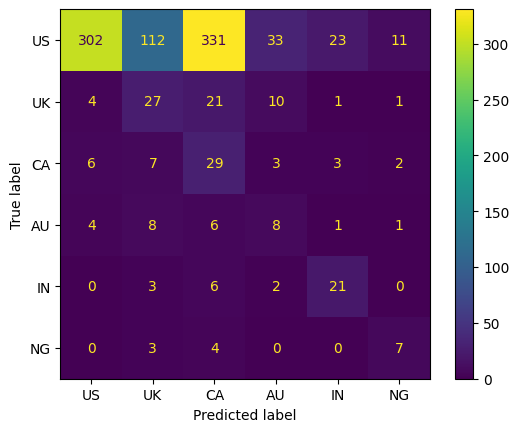

In [58]:
cm = confusion_matrix(labels_array, predictions_array_imb2)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['US', 'UK', 'CA', 'AU', 'IN', 'NG'])
cm_display.plot();